In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("./regression.csv")

In [52]:
# data generator
for area in range(300,10000,100):
    price = area * 1000
    df.loc[len(df)] = [area,price]
df.to_csv("regression.csv",index=False)

In [53]:
df.head()

,X,Y
0,100,100000
1,200,200000
2,300,300000
3,400,400000
4,500,500000


<AxesSubplot:xlabel='X', ylabel='Y'>

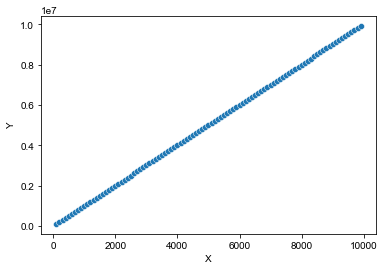

In [54]:
sns.scatterplot(x="X",y="Y",data=df)

In [55]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(df["X"].values.reshape(-1,1),df["Y"])
# reshaping is necessary

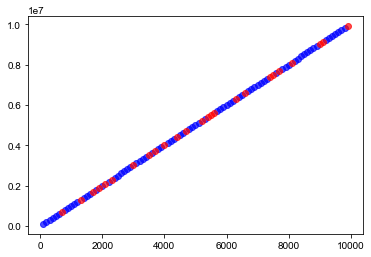

In [56]:
plt.scatter(xTrain,yTrain,c='b',alpha=.7)
plt.scatter(xTest,yTest,c='r',alpha=.7)
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
model.fit(xTrain,yTrain)

LinearRegression()

In [59]:
model.coef_, model.intercept_

(array([1000.]), -3.725290298461914e-09)

In [60]:
ypred = model.predict(xTest)

In [61]:
model.score(xTest,ypred)

1.0

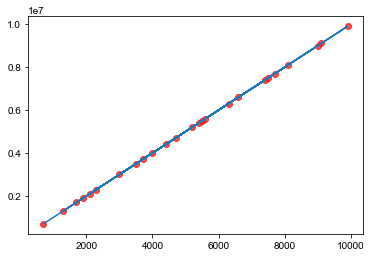

In [65]:
plt.plot(xTest,ypred)
plt.scatter(xTest,yTest,c='r',alpha=.7)
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
rmse = mean_squared_error(yTest,ypred)
r2 = r2_score(yTest,ypred)

In [72]:
rmse, r2

(3.2981430087009047e-18, 1.0)